# Nutzung vorhandener Keras Modelle

## Beispiel ImageNet Bildklassifikation mit VGG

Mit diesem Beispiel soll der Import und die Nutzung vorhandener Modelle demonstriert werden. Zu dem Zweck wird das in Keras vorhandene Klassifikationsnetz [VVG Net](https://arxiv.org/pdf/1409.1556.pdf%20http://arxiv.org/abs/1409.1556) verwendet. Das VGG Netz wurde zur Klassifikation von Bildern auf dem [ImageNet](http://www.image-net.org/) Datensatz trainiert und die resultierenden Gewichte können direkt mit dem Import des Netzes heruntergeladen werden.

Zur Ausführung des nachfolgenden Codes wurde Python3 mit Tensorflow 2.2.0 verwendet.

In [9]:
import tensorflow.keras.applications.vgg16 as keras_vgg
import tensorflow.keras.preprocessing.image as keras_preproc
# from tensorflow.keras.preprocessing.image import img_to_array, load_img

Nachdem die obligatorischen imports durchgeführt wurden, wird nun direkt das VGG-Model geladen. Hierbei muss dem Netz die Form der zu erwartenden Eingabebilder mitgeteilt werden. Mit include_top wird bestimmt, ob das komplette Klassifikationsnetz oder lediglich der Encoder für die Feature Extraktion geladen werden soll. Dies wäre sinnvoll, falls das Netz danach noch erweitert werden soll.

Wird wie in diesem Fall das komplette Netz geladen, ist die Eingabegröße durch die Fully Connected Layer des Klassifikators leider bereits auf 224 x 224 x 3 Pixel festgelegt. Eingabebilder müssen auf diese Größe angepasst werden. Die Struktur des Netzes kann anschließend mit der summary-Methode ausgegeben werden.

In [16]:
model_vgg = keras_vgg.VGG16(input_shape=(224,224,3), include_top=True, weights='imagenet')
model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Nachfolgend wird nun ein Beispielbild eines Hundes geladen. Die Zielgröße wird hier bereits übergeben, und so das Bild gleich in die richtige Größe gebracht.

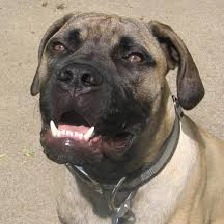

In [17]:
# load image from file
image = keras_preproc.load_img('dog.jpg', target_size=(224, 224))
image

Dieses Bild muss nun noch angepasst werden, bevor das Netz daraus ausgeführt werden kann. Zunächst wird das Bild in ein numpy Array umgewandelt. Im Anschluss muss diesem Array noch eine Dimension hinzugefügt werden. Das ist nötig, da das Netz ein Batch von Eingabebildern erwartet. Anschließend muss das Bild noch vorverarbeitet werden, damit es der erwarteten Netzeingabe entspricht. An der Stelle kann z. B. eine Normalisierung des Bildes oder eine Transformation auf einen anderen Wertebereich durchgeführt werden. Welche Vorverarbeitungsschritte genau ausgeführt werden, ist durch das Model festgelegt. Diese Schritte müssen auch bereits für die Trainingsdaten durchgeführt worden sein.

In [18]:
# convert to numpy array
image = keras_preproc.img_to_array(image)

# reshape to include batch dimension
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# execute preprocessing steps (e. g. image normalization)
image = keras_vgg.preprocess_input(image)

Das verarbeitete Bild kann nun in das bereits geladene Model gegeben werden.

In [19]:
result = model_vgg.predict(image)
result

array([[2.12877580e-06, 5.67295224e-08, 5.18768161e-07, 9.25673476e-07,
        9.94708330e-07, 2.33691503e-06, 9.89700879e-07, 6.59915088e-07,
        7.89860906e-07, 1.22988268e-07, 1.88409797e-06, 1.56297187e-06,
        3.92600498e-07, 1.17639775e-06, 1.92396740e-07, 2.11962629e-07,
        1.24313999e-06, 1.13205158e-06, 1.09741256e-06, 6.40385565e-07,
        3.03554117e-07, 3.80900872e-07, 8.43787049e-08, 1.65533606e-06,
        3.59844535e-06, 3.33712637e-06, 7.64990148e-07, 4.08304203e-07,
        1.29685941e-06, 1.62326856e-07, 1.20104824e-06, 2.39611222e-06,
        2.46978107e-06, 2.21639675e-06, 4.80381277e-06, 3.11721965e-06,
        3.58445709e-06, 1.07796313e-05, 2.53166309e-06, 1.05395918e-06,
        1.51936524e-06, 9.44992678e-07, 4.33111126e-07, 4.64196688e-07,
        5.66760150e-07, 5.51604317e-05, 7.34431183e-07, 2.40467398e-06,
        5.26372560e-07, 2.99827121e-07, 4.28944645e-07, 3.49738184e-06,
        2.48577157e-06, 2.45683009e-06, 1.82466624e-06, 8.177684

Da die auf ImageNet trainierten Modelle im Normalfall zur Klassifikation in eine von 1000 Klassen trainiert werden, gibt das Netz für jede der 1000 Klassen auch einen Wahrscheinlichkeitswert zurück. Es wird glücklicherweise auch eine Funktion bereitgestellt, um diese Ausgabe in ein leicht für Menschen interpretierbares Format zu überführen:

In [20]:
label = keras_vgg.decode_predictions(result)
label[0]

[('n02108422', 'bull_mastiff', 0.87379384),
 ('n02109047', 'Great_Dane', 0.040725872),
 ('n02093428', 'American_Staffordshire_terrier', 0.021863634),
 ('n02108089', 'boxer', 0.017687583),
 ('n02087394', 'Rhodesian_ridgeback', 0.008799897)]

Hier wurden nun die wahrscheinlichsten 5 Klassen und deren Wahrscheinlichkeit ausgegeben. Das ganze lässt sich für die wahrscheinlichste Klasse noch etwas schöner darstellen:

In [21]:
first_label = label[0][0]
print('%s (%.2f%%)' % (first_label[1], first_label[2]*100))

bull_mastiff (87.38%)


An der Stelle wäre das erwartete Label vermutlich eher Hund gewesen. Aufgrund der Vielzahl der vorhandenen Klassen untercheidet ImageNet allerdings auch zwischen verchiedenen Hunderassen. Ein Blick auf Google hilft bei der Interpretation des Ergebnisses weiter:
<img src="bullmastiff.png">
Quelle: Google